# K-means clustering

Ý tưởng đơn giản nhất về cluster (cụm) là tập hợp các điểm ở gần nhau trong một không gian nào đó
(không gian này có thể có rất nhiều chiều trong trường hợp thông tin về một điểm dữ liệu là rất lớn).


Giả sử mỗi cluster có một điểm đại diện (center) màu vàng. 
Và những điểm xung quanh mỗi center thuộc vào cùng nhóm với center đó.
Một cách đơn giản nhất, xét một điểm bất kỳ, 
ta xét xem điểm đó gần với center nào nhất thì nó thuộc về cùng nhóm với center đó.
Tới đây, chúng ta có một bài toán thú vị: 
    Trên một vùng biển hình vuông lớn có ba đảo hình vuông, tam giác, và tròn màu vàng như hình trên.
    Một điểm trên biển được gọi là thuộc lãnh hải của một đảo nếu nó nằm gần đảo này hơn so với hai đảo kia.
    Hãy xác định ranh giới lãnh hải của các đảo.

![title](img/picture.jpg)

Hình dưới đây là một hình minh họa cho việc phân chia lãnh hải nếu có 5 đảo khác nhau 
được biểu diễn bằng các hình tròn màu đen:


![title](img/picture.png)

Chúng ta thấy rằng đường phân định giữa các lãnh hải là các đường thẳng 
(chính xác hơn thì chúng là các đường trung trực của các cặp điểm gần nhau). 
Vì vậy, lãnh hải của một đảo sẽ là một hình đa giác.
Cách phân chia này trong toán học được gọi là Voronoi Diagram.

Trong không gian ba chiều, lấy ví dụ là các hành tinh,
thì (tạm gọi là) lãnh không của mỗi hành tinh sẽ là một đa diện. 
Trong không gian nhiều chiều hơn, chúng ta sẽ có những thứ (mà tôi gọi là) siêu đa diện (hyperpolygon).

## Tóm tắt thuật toán

![title](img/picture2.jpg)

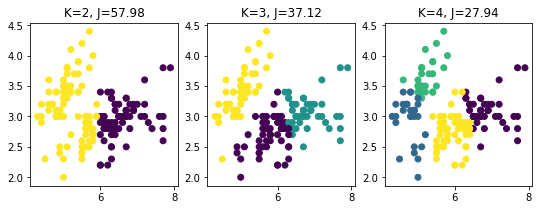

In [14]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns # nice color
%matplotlib inline

iris = datasets.load_iris() # load data 

X = iris.data[:, :2] # use only 'sepal length and sepal width'
y_iris = iris.target

km2 = cluster.KMeans(n_clusters=2).fit(X)
km3 = cluster.KMeans(n_clusters=3).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)

plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=km2.labels_)
plt.title("K=2, J=%.2f" % km2.inertia_)

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=km3.labels_)
plt.title("K=3, J=%.2f" % km3.inertia_)

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=km4.labels_)#.astype(np.float))
plt.title("K=4, J=%.2f" % km4.inertia_)
plt.show()

# Hierarchical clustering

 * Agglomerative Aapproach (bottom up approach):  Ban đầu, chúng ta xem mỗi đối tượng là 1 nhóm (cluster) và nhóm 2 đối tượng gần nhất thành 1 cluster. Quá trình này lặp lại cho đến khi tất cả các đối tượng được nhóm vào 1 cluster cuối cùng.

 * Divisive Approach (top down approach): Quá trình ngược lại với Agglomerative Approach, ban đầu chúng ta xem tất cả các đối tượng thuộc cùng 1 cluster, sau đó tiến hành phân thành 2 nhóm con (thường dựa vào khoảng cách lớn nhất). Quá trình này được thực hiện cho đến khi mỗi nhóm chỉ còn 1 đối tượng.

Các bước trong kỹ thuật phân cụm Agglomerative Approach như sau:

1.  Chuyển đổi các đặc trưng (thuộc tính - Features) của đối tượng (objects) vào ma trận khoảng cách
2.  Xem mỗi đối tượng là một cluster (chẳn hạn, nếu ta có 4 đối tượng, ban đầu chúng ta sẽ có 4 clusters)
3.  Lặp lại 2 bước sau cho đến khi số cluster bằng 1
            a. Gộp 2 cluster gần nhất
            b. Cập nhật ma trận khoảng cách

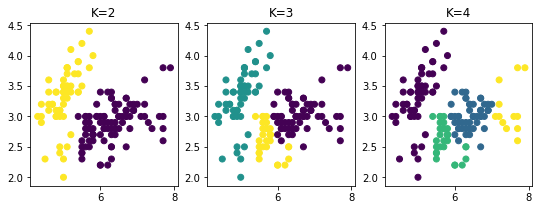

In [15]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns # nice color

iris = datasets.load_iris()
X = iris.data[:, :2] # 'sepal length (cm)''sepal width (cm)'
y_iris = iris.target

ward2 = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
ward3 = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
ward4 = cluster.AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=ward2.labels_)
plt.title("K=2")

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=ward3.labels_)
plt.title("K=3")

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=ward4.labels_) # .astype(np.float))
plt.title("K=4")
plt.show()

# Gaussian mixture models

Trong thống kê, một mô hình hỗn hợp là một mô hình xác suất để miêu tả cho sự tồn tại của các quần thể con trong toàn bộ tổng thể, mà không đòi hỏi rằng một bộ dữ liệu quan sát nên nhận diện 1 tiểu vùng mà một quan sát thuộc về.

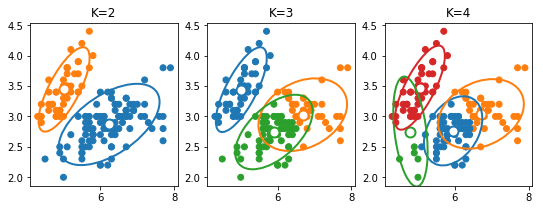

In [16]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns # nice color
import sklearn
from sklearn.mixture import GaussianMixture
import pystatsml.plot_utils

colors = sns.color_palette()
iris = datasets.load_iris()
X = iris.data[:, :2] # 'sepal length (cm)''sepal width (cm)'
y_iris = iris.target

gmm2 = GaussianMixture(n_components=2, covariance_type='full').fit(X)
gmm3 = GaussianMixture(n_components=3, covariance_type='full').fit(X)
gmm4 = GaussianMixture(n_components=4, covariance_type='full').fit(X)

plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=[colors[lab] for lab in gmm2.predict(X)]) #,color=colors)

for i in range(gmm2.covariances_.shape[0]):
    pystatsml.plot_utils.plot_cov_ellipse(cov=gmm2.covariances_[i, :], pos=gmm2.means_[i, :],
        facecolor='none', linewidth=2, edgecolor=colors[i])
    plt.scatter(gmm2.means_[i, 0], gmm2.means_[i, 1], edgecolor=colors[i],
        marker="o", s=100, facecolor="w", linewidth=2)

plt.title("K=2")
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=[colors[lab] for lab in gmm3.predict(X)])

for i in range(gmm3.covariances_.shape[0]):
    pystatsml.plot_utils.plot_cov_ellipse(cov=gmm3.covariances_[i, :], pos=gmm3.means_
        [i, :],
            facecolor='none', linewidth=2, edgecolor=colors[i])
    plt.scatter(gmm3.means_[i, 0], gmm3.means_[i, 1], edgecolor=colors[i],
        marker="o", s=100, facecolor="w", linewidth=2)

plt.title("K=3")
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=[colors[lab] for lab in gmm4.predict(X)])  # .astype(np.float))

for i in range(gmm4.covariances_.shape[0]):
    pystatsml.plot_utils.plot_cov_ellipse(cov=gmm4.covariances_[i, :], pos=gmm4.means_
        [i, :],
            facecolor='none', linewidth=2, edgecolor=colors[i])
    plt.scatter(gmm4.means_[i, 0], gmm4.means_[i, 1], edgecolor=colors[i],
        marker="o", s=100, facecolor="w", linewidth=2)
    
_ = plt.title("K=4")

plt.show()

# Model selection

[1 2 3 4 5 6 7 8 9]
1
Choose k= 2


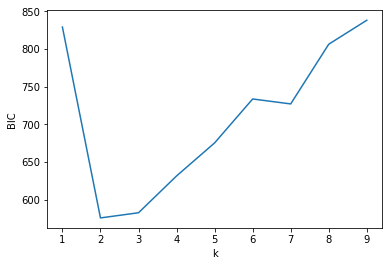

In [18]:

X = iris.data
y_iris = iris.target
bic = list()

#print(X)
ks = np.arange(1, 10)
print(ks)
for k in ks:
    gmm = GaussianMixture(n_components=k, covariance_type='full')
    gmm.fit(X)
    bic.append(gmm.bic(X))

k_chosen = ks[np.argmin(bic)]
plt.plot(ks, bic)
plt.xlabel("k")
plt.ylabel("BIC")
print("Choose k=", k_chosen)

plt.show()